## National Test Data Analysis

In [165]:
import pandas as pd
import numpy as np
#import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [166]:
df = pd.read_csv('../data/Matrik.csv')

In [167]:
df.head()

,Name,Gender,Type,Batch,Maths,English,Civics,Chemistry,Biology,Physics,Geography,History,GPA,Matrik
0,Bethelhem Meba Weldekidan,F,N,2022,75.0,93.0,90.0,80.0,84.0,76.0,NaN,NaN,83.0,400.0
1,Megfira Desalegn Adebo,F,N,2022,92.0,99.0,95.0,82.0,88.0,83.0,NaN,NaN,89.8,450.0
2,Kaleab Million,M,N,2022,85.0,96.0,92.0,95.0,86.0,86.0,NaN,NaN,90.0,516.0
3,Yonas Lake,M,N,2022,97.0,91.0,89.0,92.0,89.0,81.0,NaN,NaN,89.8,420.0
4,Hanna Kassahun Birle,F,N,2022,56.0,92.0,89.0,68.0,80.0,76.0,NaN,NaN,76.8,409.0


In [168]:
df.Batch.value_counts()

2022    45
2023    40
Name: Batch, dtype: int64

In [169]:
df.Type.value_counts()

N    61
A    24
Name: Type, dtype: int64

In [170]:
df_2023 = df[df.Batch == 2023]
df_2022 = df[df.Batch == 2022]

In [171]:
df_2023.describe()

,Batch,Maths,English,Civics,Chemistry,Biology,Physics,Geography,History,GPA,Matrik
count,40.0,40.000000,40.000000,40.000000,26.000000,26.000000,26.000000,14.000000,14.000000,40.000000,0.0
mean,2023.0,73.130000,84.387250,86.975500,88.231538,80.726154,76.093462,80.864286,84.972857,81.624250,NaN
std,0.0,12.440615,8.180885,6.341342,5.327816,7.875962,9.736882,5.918531,7.047903,6.410415,NaN
min,2023.0,27.530000,67.670000,71.080000,71.430000,59.860000,52.520000,68.460000,67.370000,61.480000,NaN
25%,2023.0,65.630000,77.820000,82.870000,85.477500,75.555000,71.025000,77.297500,83.915000,78.155000,NaN
50%,2023.0,71.915000,87.165000,88.060000,88.890000,81.505000,77.175000,79.510000,86.765000,82.940000,NaN
75%,2023.0,80.255000,90.830000,91.042500,90.742500,84.925000,80.332500,85.377500,89.647500,85.775000,NaN
max,2023.0,95.960000,95.100000,99.000000,99.710000,95.160000,96.150000,90.670000,91.940000,95.200000,NaN


In [172]:
df_2022.describe()

,Batch,Maths,English,Civics,Chemistry,Biology,Physics,Geography,History,GPA,Matrik
count,45.0,45.000000,45.000000,45.000000,35.000000,35.000000,35.000000,10.000000,10.000000,45.000000,35.000000
mean,2022.0,80.177778,93.511111,87.311111,83.514286,80.514286,81.142857,75.500000,85.900000,84.308889,458.085714
std,0.0,12.806761,5.132881,7.564337,9.422662,9.826050,6.834785,13.116995,14.161372,7.453792,63.586149
min,2022.0,50.000000,81.000000,55.000000,63.000000,50.000000,70.000000,55.000000,52.000000,58.600000,359.000000
25%,2022.0,73.000000,90.000000,85.000000,76.500000,76.500000,76.000000,67.500000,81.250000,81.200000,410.000000
50%,2022.0,83.000000,94.000000,89.000000,85.000000,81.000000,81.000000,80.000000,90.000000,85.200000,444.000000
75%,2022.0,89.000000,98.000000,92.000000,90.500000,87.000000,86.000000,83.750000,96.000000,89.800000,498.500000
max,2022.0,100.000000,100.000000,95.000000,98.000000,96.000000,95.000000,92.000000,98.000000,96.800000,595.000000


In [173]:
df.groupby('Batch')[['GPA']].mean()

,GPA
Batch,
2022,84.308889
2023,81.624250


In [174]:
#Common Subjects
df.groupby('Batch')[['Maths',	'English' ,	'Civics']].mean()

,Maths,English,Civics
Batch,,,
2022,80.177778,93.511111,87.311111
2023,73.130000,84.387250,86.975500


In [175]:
df.groupby('Batch')[['Maths',	'English' ,	'Civics']].median()

,Maths,English,Civics
Batch,,,
2022,83.000,94.000,89.00
2023,71.915,87.165,88.06


In [176]:
#Science Subjects
df.groupby('Batch')[['Chemistry',	'Biology' ,	'Physics']].mean()

,Chemistry,Biology,Physics
Batch,,,
2022,83.514286,80.514286,81.142857
2023,88.231538,80.726154,76.093462


In [177]:
#Science Subjects
df.groupby('Batch')[['Chemistry',	'Biology' ,	'Physics']].median()

,Chemistry,Biology,Physics
Batch,,,
2022,85.00,81.000,81.000
2023,88.89,81.505,77.175


In [178]:
#Social Subjects
df.groupby('Batch')[['Geography' ,	'History']].mean()

,Geography,History
Batch,,
2022,75.500000,85.900000
2023,80.864286,84.972857


## Data Vizualizations

<AxesSubplot:xlabel='Batch'>

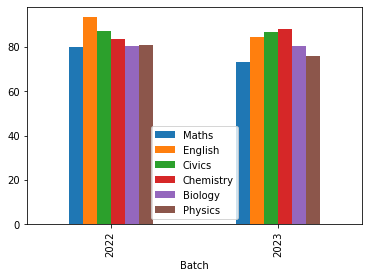

In [179]:
df.groupby('Batch')[['Maths',	'English' ,	'Civics', 'Chemistry',	'Biology' ,	'Physics']].mean().plot.bar()

# Machine Learning

In [180]:
Science = df[df.Type == 'N']

In [181]:
Science.Batch.value_counts()

2022    35
2023    26
Name: Batch, dtype: int64

In [182]:
Science.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 70
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       61 non-null     object 
 1   Gender     61 non-null     object 
 2   Type       61 non-null     object 
 3   Batch      61 non-null     int64  
 4   Maths      61 non-null     float64
 5   English    61 non-null     float64
 6   Civics     61 non-null     float64
 7   Chemistry  61 non-null     float64
 8   Biology    61 non-null     float64
 9   Physics    61 non-null     float64
 10  Geography  0 non-null      float64
 11  History    0 non-null      float64
 12  GPA        61 non-null     float64
 13  Matrik     35 non-null     float64
dtypes: float64(10), int64(1), object(3)
memory usage: 7.1+ KB


In [183]:
dfx = Science.drop(['Geography', 'History', 'Name'], axis=1)

In [184]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 70
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     61 non-null     object 
 1   Type       61 non-null     object 
 2   Batch      61 non-null     int64  
 3   Maths      61 non-null     float64
 4   English    61 non-null     float64
 5   Civics     61 non-null     float64
 6   Chemistry  61 non-null     float64
 7   Biology    61 non-null     float64
 8   Physics    61 non-null     float64
 9   GPA        61 non-null     float64
 10  Matrik     35 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.7+ KB


In [185]:
dfx_2023 = dfx[dfx.Batch == 2023]
dfx_2022 = dfx[dfx.Batch == 2022]

In [186]:
dfx_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     35 non-null     object 
 1   Type       35 non-null     object 
 2   Batch      35 non-null     int64  
 3   Maths      35 non-null     float64
 4   English    35 non-null     float64
 5   Civics     35 non-null     float64
 6   Chemistry  35 non-null     float64
 7   Biology    35 non-null     float64
 8   Physics    35 non-null     float64
 9   GPA        35 non-null     float64
 10  Matrik     35 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.3+ KB


In [187]:
dfx_2022

,Gender,Type,Batch,Maths,English,Civics,Chemistry,Biology,Physics,GPA,Matrik
0,F,N,2022,75.0,93.0,90.0,80.0,84.0,76.0,83.0,400.0
1,F,N,2022,92.0,99.0,95.0,82.0,88.0,83.0,89.8,450.0
2,M,N,2022,85.0,96.0,92.0,95.0,86.0,86.0,90.0,516.0
3,M,N,2022,97.0,91.0,89.0,92.0,89.0,81.0,89.8,420.0
4,F,N,2022,56.0,92.0,89.0,68.0,80.0,76.0,76.8,409.0
5,M,N,2022,89.0,95.0,88.0,85.0,64.0,84.0,84.2,534.0
6,F,N,2022,89.0,95.0,88.0,85.0,71.0,84.0,85.3,439.0
7,M,N,2022,96.0,100.0,95.0,90.0,92.0,87.0,93.3,565.0
8,M,N,2022,78.0,100.0,86.0,72.0,77.0,76.0,81.5,463.0
9,M,N,2022,85.0,97.0,73.0,63.0,70.0,76.0,77.3,359.0


In [188]:
X = dfx_2022[['Maths', 'English', 'Civics', 'Chemistry', 'Biology', 'Physics', 'GPA']]
y = dfx_2022[['Matrik']]

In [194]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 
reg.fit(X,y)         
score = reg.score(X, y) 
score

0.7086975205930848